In [1]:
import pandas as pd
import matplotlib.pyplot as plt

print("Setup successful!")


Setup successful!


In [2]:
df = pd.read_csv(r'C:\Users\abc\Desktop\Personal tracker\personal tracker.csv')

df.head()

,Date,Category,Description,Income,Expense
0,01/03/2023,Salary,Monthly paycheck,5500.0,NaN
1,01/03/2023,Rent,Studio apartment rent,NaN,1350.00
2,02/03/2023,Utilities,Electricity bill,NaN,98.75
3,04/03/2023,Grocery,Weekly supermarket trip,NaN,127.40
4,05/03/2023,Transportation,Monthly metro pass,NaN,120.00


In [3]:
df.isnull().sum()

Date            0
Category        0
Description     0
Income         44
Expense         3
dtype: int64

In [6]:
df.fillna({'Income': 0}, inplace=True)
df.fillna({'Expenses': 0}, inplace=True)

df.dtypes


Date            object
Category        object
Description     object
Income         float64
Expense        float64
dtype: object

In [7]:
total_income = df['Income'].sum()
total_expense = df['Expense'].sum()

In [8]:
savings_percentage = ((total_income - total_expense) / total_income) * 100

In [9]:
print(f"Total Income: {total_income}")
print(f"Total Expenses: {total_expense}")
print(f"Savings Percentage: {savings_percentage}%")

Total Income: 17200.0
Total Expenses: 10561.9
Savings Percentage: 38.59360465116279%


In [10]:
df['Date'] = pd.to_datetime(df['Date'], format='%d/%m/%Y')

In [12]:
df['Month'] = df['Date'].dt.to_period('M')
print(df[['Date', 'Month']].head())

        Date    Month
0 2023-03-01  2023-03
1 2023-03-01  2023-03
2 2023-03-02  2023-03
3 2023-03-04  2023-03
4 2023-03-05  2023-03


In [14]:
monthly_income = df.groupby('Month')['Income'].sum()
monthly_expenses = df.groupby('Month')['Expense'].sum()

print(monthly_income)
print(monthly_expenses)

Month
2023-03    5500.0
2023-04    5500.0
2023-05    6200.0
Freq: M, Name: Income, dtype: float64
Month
2023-03    2703.08
2023-04    2707.59
2023-05    5151.23
Freq: M, Name: Expense, dtype: float64


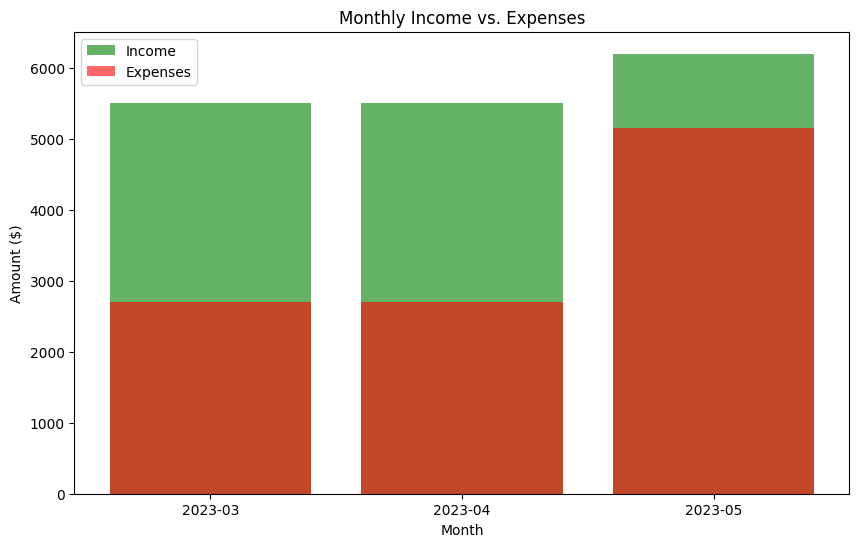

In [15]:
plt.figure(figsize=(10, 6))
plt.bar(monthly_income.index.astype(str), monthly_income, label='Income', alpha=0.6, color='g')
plt.bar(monthly_expenses.index.astype(str), monthly_expenses, label='Expenses', alpha=0.6, color='r')
plt.xlabel('Month')
plt.ylabel('Amount ($)')
plt.title('Monthly Income vs. Expenses')
plt.legend()
plt.show()

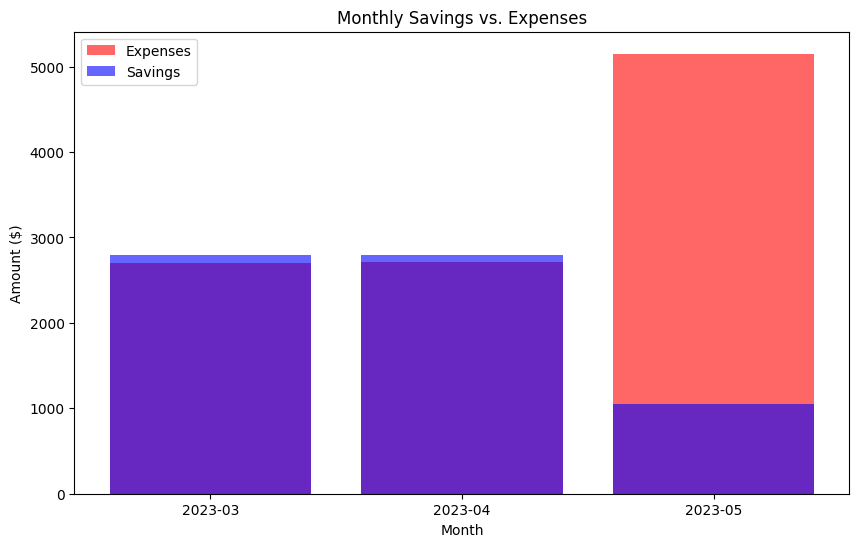

In [16]:
monthly_savings = monthly_income - monthly_expenses
plt.figure(figsize=(10, 6))
plt.bar(monthly_expenses.index.astype(str), monthly_expenses, label='Expenses', alpha=0.6, color='r')
plt.bar(monthly_savings.index.astype(str), monthly_savings, label='Savings', alpha=0.6, color='b')
plt.xlabel('Month')
plt.ylabel('Amount ($)')
plt.title('Monthly Savings vs. Expenses')
plt.legend()
plt.show()

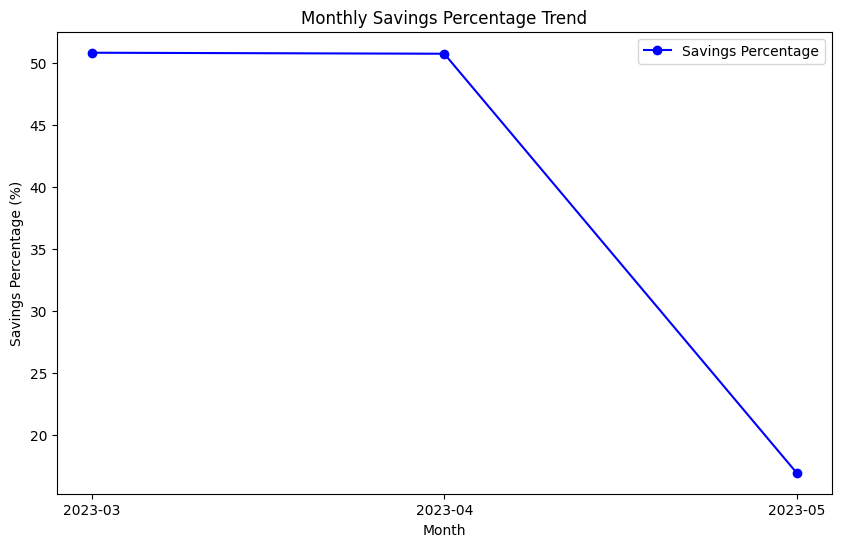

In [17]:
monthly_savings_percentage = ((monthly_income - monthly_expenses) / monthly_income) * 100
plt.figure(figsize=(10, 6))
plt.plot(monthly_savings_percentage.index.astype(str), monthly_savings_percentage, marker='o', label='Savings Percentage', color='b')
plt.xlabel('Month')
plt.ylabel('Savings Percentage (%)')
plt.title('Monthly Savings Percentage Trend')
plt.legend()
plt.show()